B. Preliminary Exploratory Data Analysis

Now that you have a first overview of the dataset, your goal is to get familiar with its strengths and weaknesses and prepare it for the in-depth analysis you will perform in the following tasks. Please complete the following subtasks.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_pickle('data_385k.pkl', compression='zip')

In [2]:
float_cols = [column for column in df.columns if df.dtypes[column] == 'float']

numeric_cols = [column for column in df.columns if (df.dtypes[column] == 'float') or (df.dtypes[column] == 'int')]

categorical_cols = [column for column in df.columns if df.dtypes[column] == 'object']

1_  Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data ?

In [3]:
df.duplicated().sum()

10500

Lets delete duplicate entries

In [4]:
df.shape

(385384, 99)

In [5]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.shape

(374884, 99)

2_ Show the proportion of missing values in the data using appropriate visualizations and numerical summaries.

Text(0, 0.5, 'entries indexes')

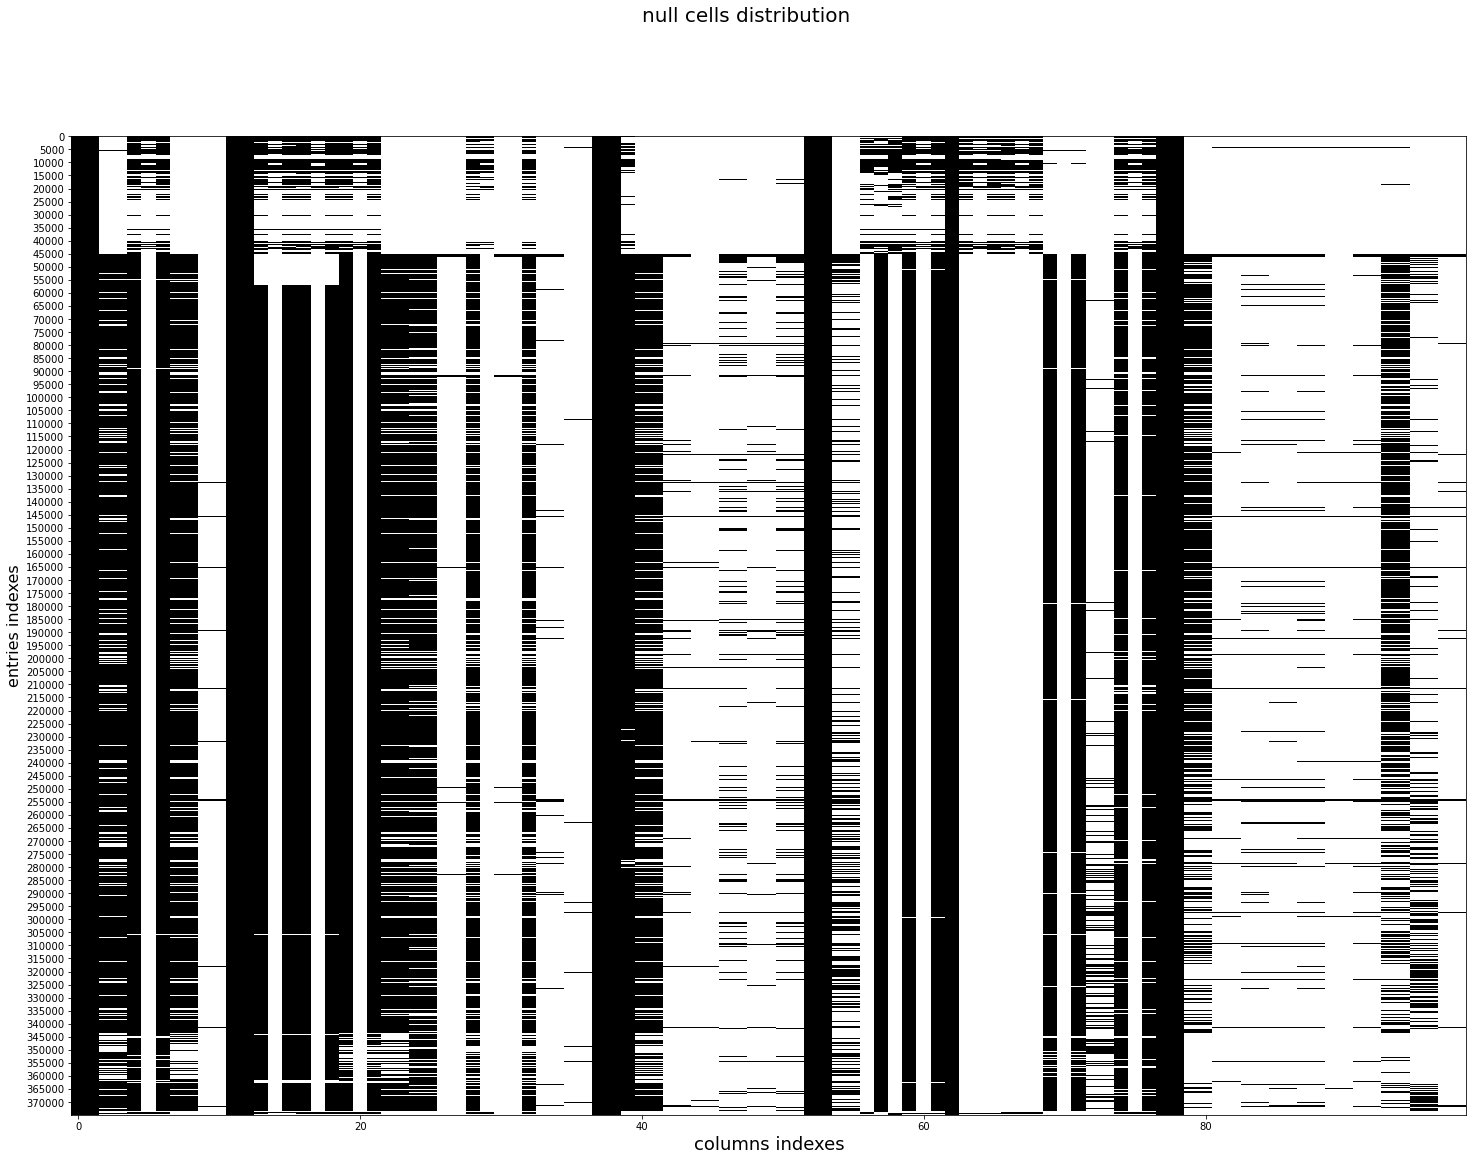

In [6]:
fig = plt.figure(figsize=(25, 18))

yticks=np.arange(0,df.shape[0],5000)

plt.yticks(yticks)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray");

fig.suptitle('null cells distribution', fontsize=20)
plt.xlabel('columns indexes', fontsize=18)
plt.ylabel('entries indexes', fontsize=16)

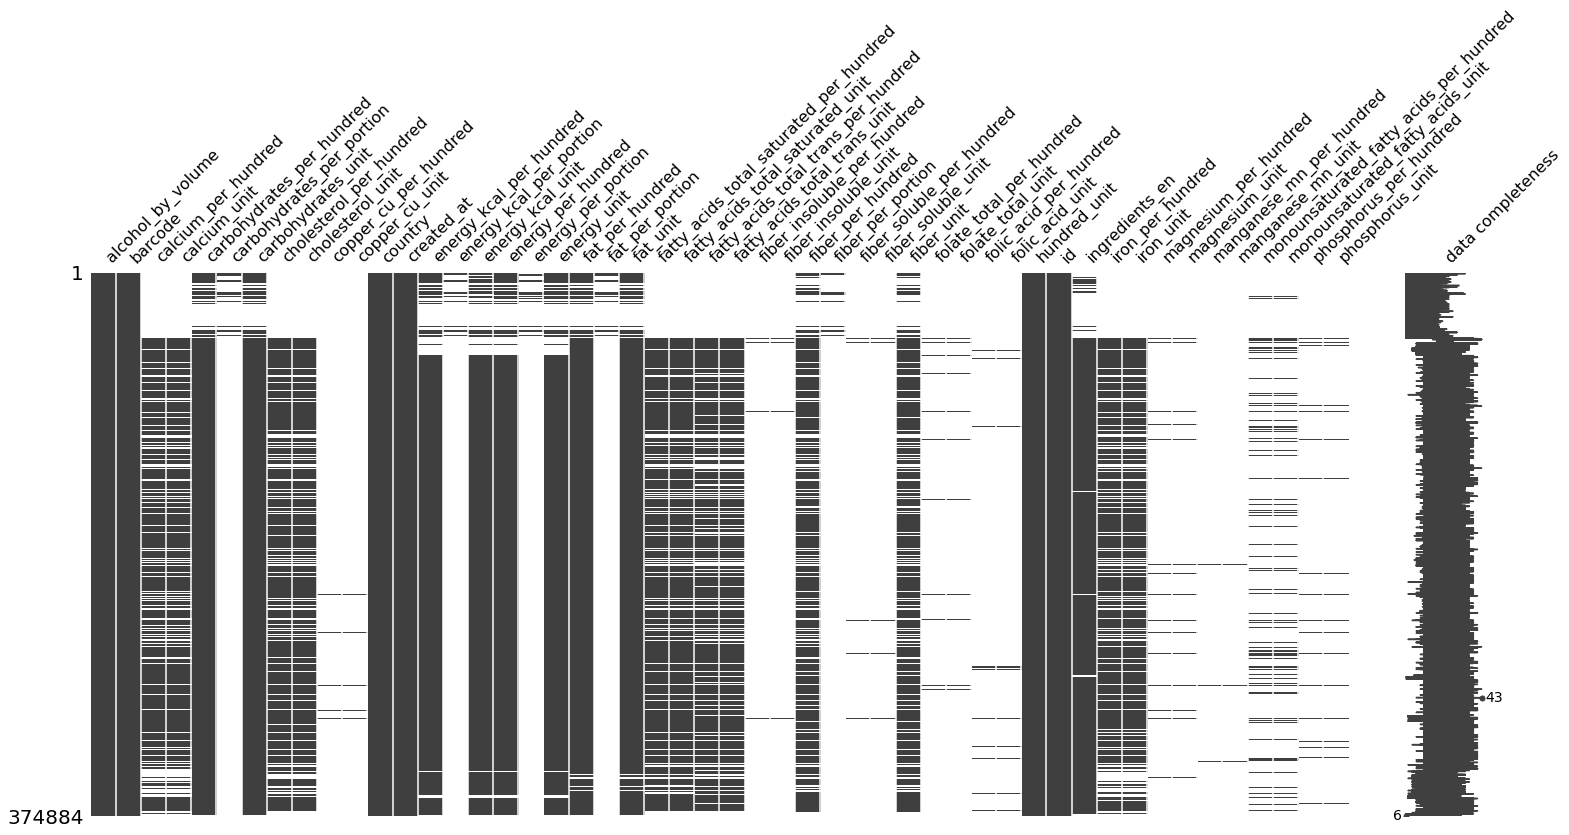

In [7]:
df_left = df. iloc[:, 0:50]
df_right = df. iloc[:, 49:]

msno.matrix(df_left, labels=True);

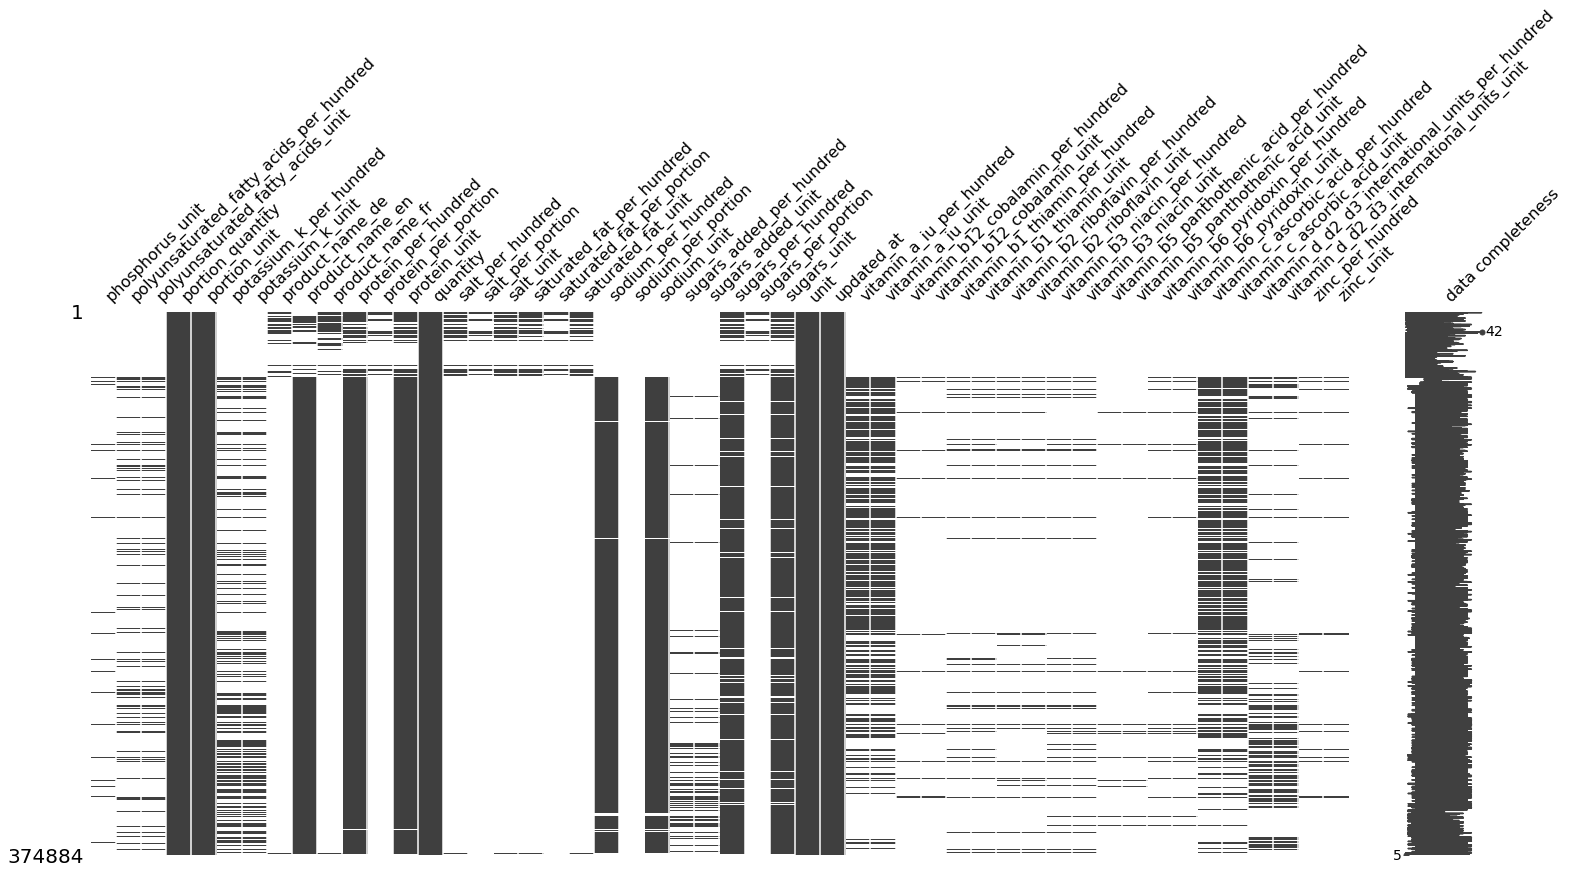

In [8]:
msno.matrix(df_right, labels=True);

Text(0, 0.5, 'missing rate')

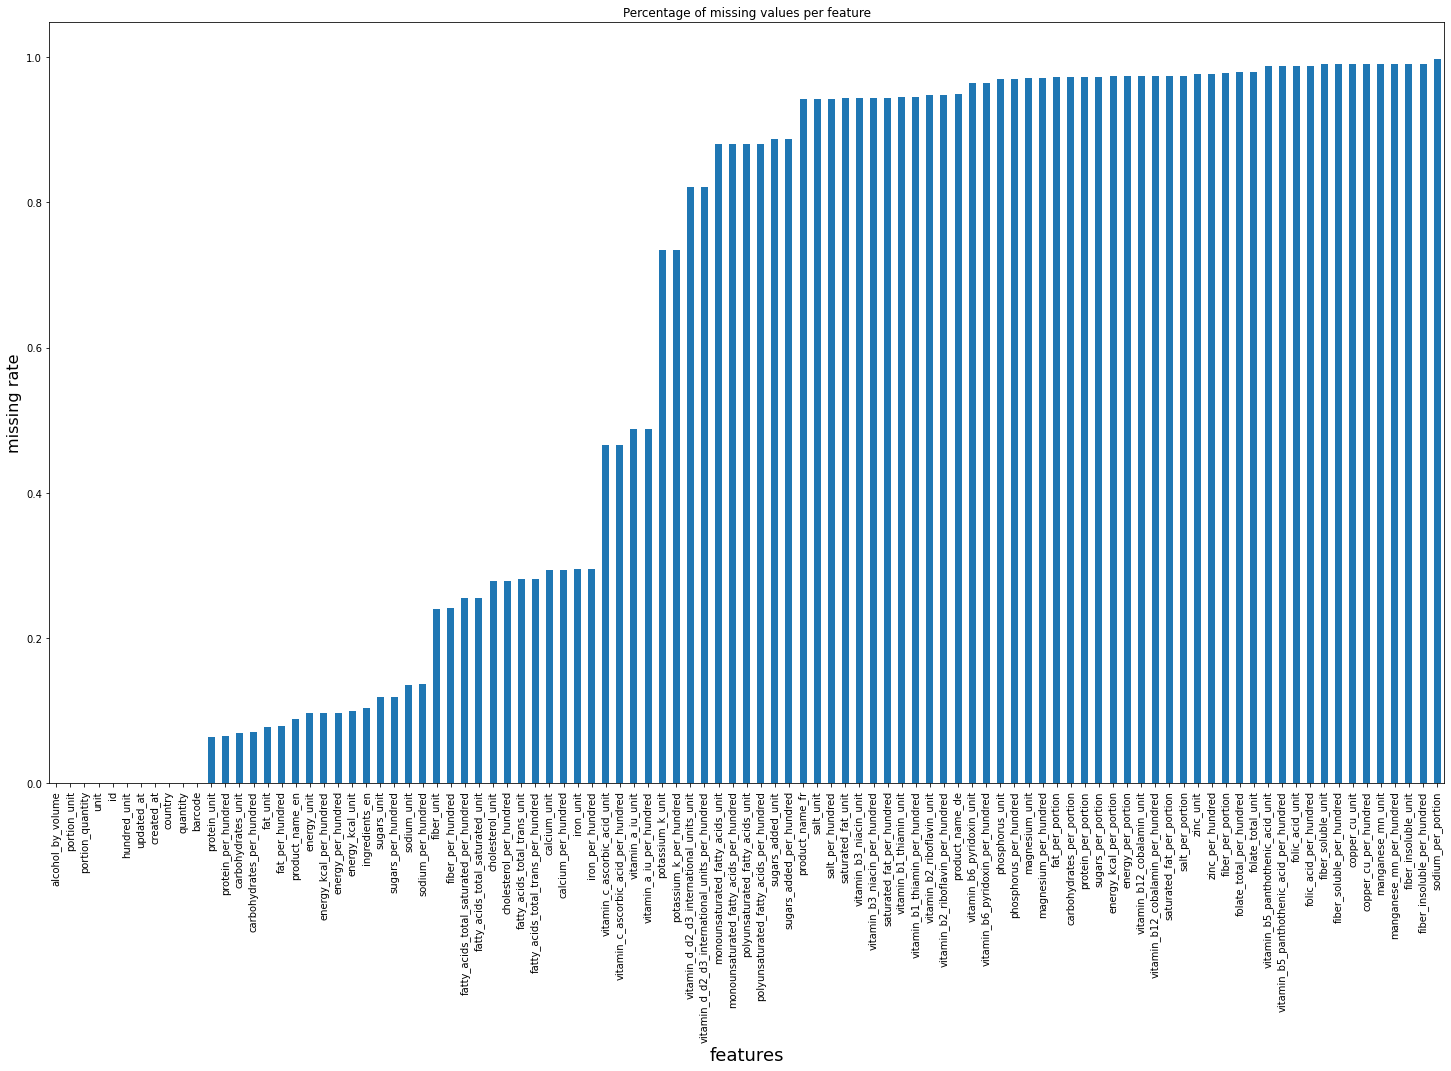

In [9]:
fig = df.isna().mean().sort_values().plot(
    kind="bar", figsize=(25, 14), title="Percentage of missing values per feature");

plt.xlabel('features', fontsize=18)
plt.ylabel('missing rate', fontsize=16)

In [10]:
pd.set_option('display.max_rows',None)

print("Features                                     missing values count")
print("=================================================================")
df.isna().sum().sort_values(ascending=False)

Features                                     missing values count


sodium_per_portion                                 374131
fiber_insoluble_per_hundred                        371375
fiber_insoluble_unit                               371374
manganese_mn_per_hundred                           371350
manganese_mn_unit                                  371347
copper_cu_per_hundred                              371273
copper_cu_unit                                     371273
fiber_soluble_per_hundred                          371057
fiber_soluble_unit                                 371055
folic_acid_per_hundred                             370428
folic_acid_unit                                    370409
vitamin_b5_panthothenic_acid_per_hundred           370343
vitamin_b5_panthothenic_acid_unit                  370325
folate_total_per_hundred                           367188
folate_total_unit                                  367188
fiber_per_portion                                  366707
zinc_per_hundred                                   366369
zinc_unit     

3_ Now that you know the extent of missing values in the data, you should address them. Your goal is to keep as much data as possible in your DataFrame. What is the shape of the remaining data?

===> 3 ways to complete the goal :

    A: we keep all rows to get maximum statistical power , but we have to drop columns so we lose possibility to work on their features
    
    B: we have to split the mother dataframe into subsets, some subsets are adapted to study specific features, but with less entries the statistic strenght si lower
    
    C: we fill holes with median values for numeric datas, and most frequent strings for object type , but their we introduce biase.

Lets fill the nan cells with median value
==========================================

In [11]:
df.fiber_insoluble_unit.value_counts()

g    3510
Name: fiber_insoluble_unit, dtype: int64

In [12]:
df['fiber_insoluble_unit'].isna().sum()

371374

In [13]:
df.manganese_mn_unit.value_counts()

mg    3537
Name: manganese_mn_unit, dtype: int64

In [14]:
df['manganese_mn_unit'].isna().sum()

371347

In [15]:
df["fiber_insoluble_unit"].fillna(value="g", inplace=True)
df["manganese_mn_unit"].fillna(value="mg", inplace=True)

print(df.fiber_insoluble_unit.value_counts())
print(df.manganese_mn_unit.value_counts())

print(df['fiber_insoluble_unit'].isna().sum())
print(df['manganese_mn_unit'].isna().sum())




g    374884
Name: fiber_insoluble_unit, dtype: int64
mg    374884
Name: manganese_mn_unit, dtype: int64
0
0


In [16]:
print(df['protein_per_hundred'].isna().sum())
print(df['carbohydrates_per_hundred'].isna().sum())
print(df['fat_per_hundred'].isna().sum())

24395
26333
29624


In [17]:
print(df['protein_per_hundred'].mean())
print(df['carbohydrates_per_hundred'].mean())
print(df['fat_per_hundred'].mean())

7.251007620781252
34.00523128609586
12.705385245901638


In [18]:
col1, col2, col3 = "protein_per_hundred", "carbohydrates_per_hundred", "fat_per_hundred"


df[[col1, col2, col3]] = df[[col1, col2, col3]].fillna(df[[col1, col2, col3]].median())

In [19]:
print(df['protein_per_hundred'].isna().sum())
print(df['carbohydrates_per_hundred'].isna().sum())
print(df['fat_per_hundred'].isna().sum())

0
0
0


In [20]:
print(df['protein_per_hundred'].mean())
print(df['carbohydrates_per_hundred'].mean())
print(df['fat_per_hundred'].mean())

7.071990028915612
33.26941896693378
12.132051808025947


B 4_ Let’s continue exploring the categorical variables in more detail. What is the number of unique values in categorical variables ? 
--------------------------------------------------------------------------------------------------------------------------------------
Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.
-----------------------------------------------------------------------------------------------------------------------------

In [21]:
unique_values = df.select_dtypes(include="object").nunique().sort_values(ascending=False)
unique_values

barcode                                     374446
ingredients_en                              247227
product_name_en                             222878
updated_at                                   47015
created_at                                   46990
product_name_fr                              20983
product_name_de                              18572
unit                                            10
portion_unit                                     7
country                                          7
hundred_unit                                     3
vitamin_d_d2_d3_international_units_unit         1
protein_unit                                     1
salt_unit                                        1
saturated_fat_unit                               1
sodium_unit                                      1
vitamin_c_ascorbic_acid_unit                     1
vitamin_b6_pyridoxin_unit                        1
sugars_added_unit                                1
vitamin_a_iu_unit              

Text(0, 0.5, 'unique values count')

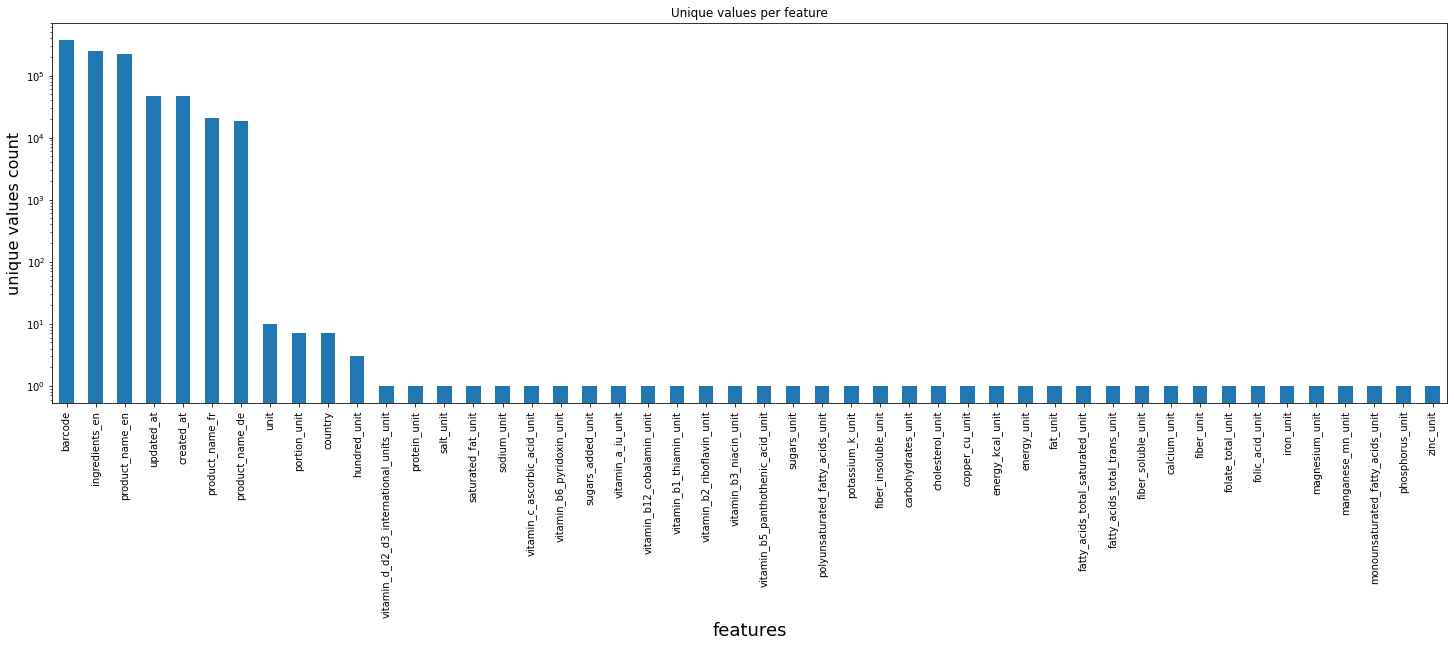

In [22]:
fig = unique_values.plot.bar(logy=True, figsize=(25, 7), title="Unique values per feature",);

plt.xlabel('features', fontsize=18)
plt.ylabel('unique values count', fontsize=16)

Unique entries by country:

In [23]:
entries_by_country = df["country"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

print("Country     unique entries")
print("========================")
entries_by_country

Country     unique entries


US    328289
CH     33117
DE     10639
IT      2719
FR       118
AT         1
UK         1
Name: country, dtype: int64

Preparing process for displaying pie

In [24]:
list_of_countries = list(entries_by_country.index)
print(list_of_countries)

['US', 'CH', 'DE', 'IT', 'FR', 'AT', 'UK']


In [25]:
list_of_entries_by_country = entries_by_country.tolist()
print(list_of_entries_by_country)

[328289, 33117, 10639, 2719, 118, 1, 1]


In [26]:
countries_names = df["country"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).index.tolist()

In [27]:
countries_names_serie = pd.Series(countries_names) 

In [28]:
serie_of_country = pd.Series(list_of_countries) 

serie_of_entries_by_country = pd.Series(list_of_entries_by_country) 

In [29]:
chart_df = serie_of_country.to_frame().join(serie_of_entries_by_country.to_frame(), how = 'left', lsuffix='left', rsuffix='right')
chart_df

,0left,0right
0,US,328289
1,CH,33117
2,DE,10639
3,IT,2719
4,FR,118
5,AT,1
6,UK,1


In [30]:
chart_df.rename(columns={'0left': 'country', '0right': 'entries'}, inplace=True)
chart_df

,country,entries
0,US,328289
1,CH,33117
2,DE,10639
3,IT,2719
4,FR,118
5,AT,1
6,UK,1


In [31]:
chart_df['entries'] = chart_df['entries'].astype('int')

print(chart_df['entries'] )

0    328289
1     33117
2     10639
3      2719
4       118
5         1
6         1
Name: entries, dtype: int64


In [32]:
chart_df['percent'] = (chart_df['entries'] / 
                  chart_df['entries'].sum()) * 100

print(chart_df['percent'])

0    87.570822
1     8.833933
2     2.837945
3     0.725291
4     0.031476
5     0.000267
6     0.000267
Name: percent, dtype: float64


In [33]:
significant_entries = chart_df['percent'][:4]

print(significant_entries)

0    87.570822
1     8.833933
2     2.837945
3     0.725291
Name: percent, dtype: float64


In [34]:
myexplode = (0.1, 0.4,0.7,0.0,0.5,0.1, 0.9)

group = chart_df.groupby(['country']).sum()

print(group)

         entries    percent
country                    
AT             1   0.000267
CH         33117   8.833933
DE         10639   2.837945
FR           118   0.031476
IT          2719   0.725291
UK             1   0.000267
US        328289  87.570822


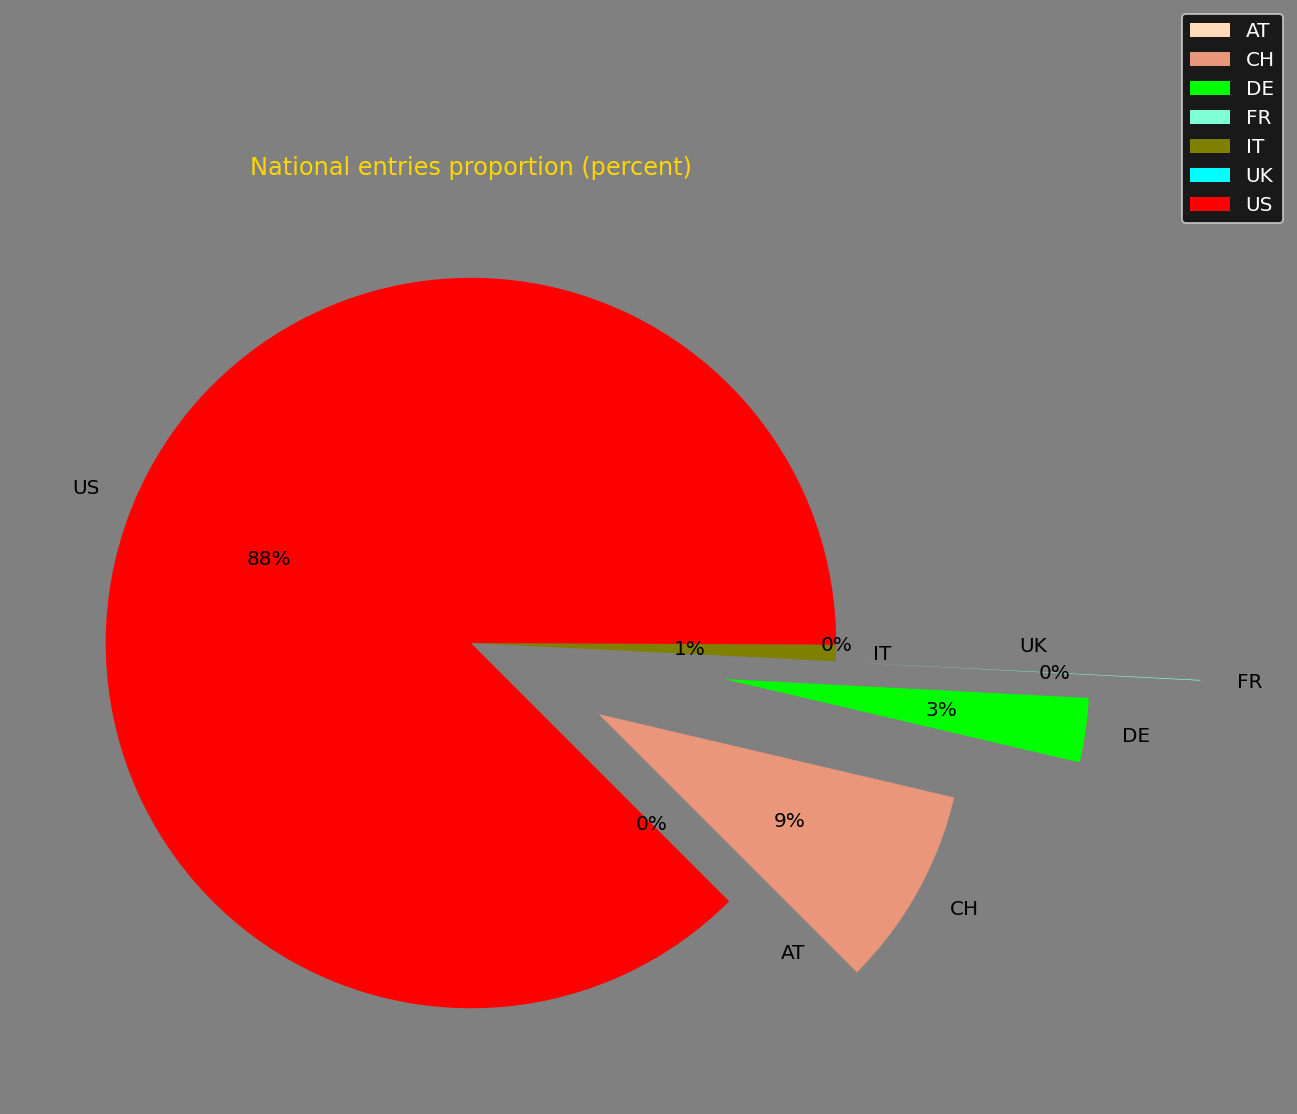

In [35]:
fig = plt.figure(figsize=(18,10),dpi=144, facecolor = "grey")

ax1 = fig.add_subplot(121)
ax1.set_title("National entries proportion (percent)", color='gold')

myexplode = (0.1, 0.4,0.7,1.0,0.0,0.4, 0.0)

colors = ["peachpuff", "darksalmon", "lime", "aquamarine","olive","cyan","red"]
headings = group.index

val_left =  group.percent
plt.pie(val_left, labels=headings, autopct='%0.f%%', startangle= -45, colors=colors, explode = myexplode, shadow=False)

plt.legend(facecolor='k', labelcolor='w', loc="upper right", bbox_to_anchor=(1.4,1.2))

plt.show()

In [36]:
entries_by_unit = df["unit"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

entries_by_unit

g       324240
ml       48941
cl         787
l          495
kg         358
dl          29
?           22
Floz         5
Oz           4
Lb           3
Name: unit, dtype: int64

In [37]:
df_result = pd.DataFrame(entries_by_unit)

print(df_result)

        unit
g     324240
ml     48941
cl       787
l        495
kg       358
dl        29
?         22
Floz       5
Oz         4
Lb         3


In [38]:
df_result = df_result.reset_index()

print(df_result)

  index    unit
0     g  324240
1    ml   48941
2    cl     787
3     l     495
4    kg     358
5    dl      29
6     ?      22
7  Floz       5
8    Oz       4
9    Lb       3


In [39]:
dico = {'index': 'unit',
        'unit': 'entries'}
 
# call rename () method
df_result.rename(columns=dico,
          inplace=True)

df_result

,unit,entries
0,g,324240
1,ml,48941
2,cl,787
3,l,495
4,kg,358
5,dl,29
6,?,22
7,Floz,5
8,Oz,4
9,Lb,3


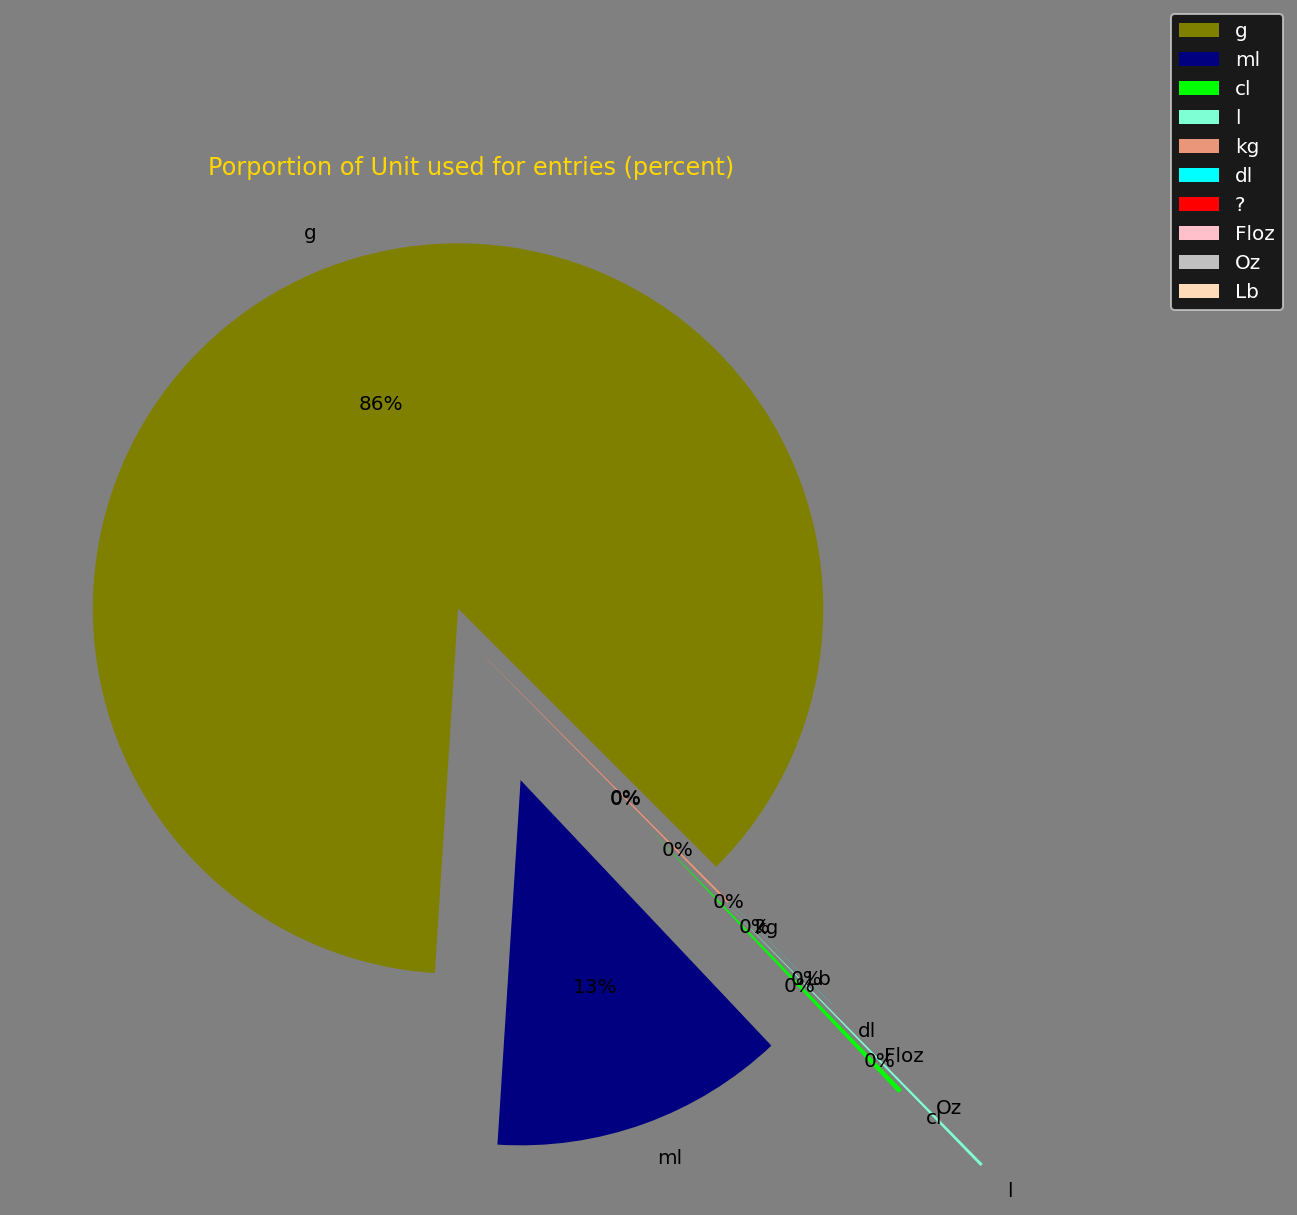

In [40]:
fig = plt.figure(figsize=(18,10),dpi=144, facecolor = "grey")

ax1 = fig.add_subplot(121)
ax1.set_title("Porportion of Unit used for entries (percent)", color='gold')

myexplode = (0.1, 0.4,0.7,1.0,0.0,0.4, 0.0,0.5,0.7,0.2)


colors = ["olive", "navy", "lime", "aquamarine","darksalmon","cyan","red","pink","silver","peachpuff"]
headings = df_result['unit'].tolist()

val_left =  df_result['entries'].tolist()



plt.pie(val_left, labels=headings, autopct='%0.f%%', startangle= -45, colors=colors, explode = myexplode, shadow=False)

plt.legend(facecolor='k', labelcolor='w', loc="upper right", bbox_to_anchor=(1.4,1.2))

plt.show()

B5 
=======

In [41]:
df[numeric_cols].describe()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,carbohydrates_per_portion,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_kcal_per_portion,energy_per_hundred,energy_per_portion,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,374884.000000,264854.000000,374884.000000,10355.000000,270282.000000,3611.000000,338574.000000,9967.000000,338571.000000,9795.000000,...,192093.000000,9749.000000,20402.000000,19683.000000,21117.000000,4541.000000,13239.000000,200006.000000,67024.000000,8515.000000
mean,0.027911,116.647405,33.269419,19.283369,58.981358,5.468045,272.484231,159.081054,1139.512786,658.346246,...,494.236708,17.462608,0.925326,1.680103,9.846486,13.423836,1.395542,15.704688,14.186515,6.078807
std,0.769066,2557.910159,39.479051,18.395222,1934.718972,274.468684,258.287614,139.150893,1079.676340,570.591178,...,2445.251154,405.522001,13.490207,142.610273,73.079281,347.572215,6.093154,583.641608,73.262518,108.979545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.200000,7.000000,0.000000,0.210000,89.000000,78.000000,372.380000,322.500000,...,0.000000,0.420000,0.000000,0.200000,3.000000,0.600000,0.170000,0.000000,0.000000,0.800000
50%,0.000000,36.000000,23.530000,15.600000,0.000000,0.480000,267.000000,127.000000,1117.130000,530.000000,...,0.000000,1.620000,0.000000,0.330000,4.880000,1.430000,0.520000,0.000000,0.000000,2.730000
75%,0.000000,102.000000,57.140000,25.000000,25.000000,1.070000,400.000000,194.000000,1673.600000,805.000000,...,352.000000,4.200000,1.000000,0.590000,8.330000,3.170000,1.220000,3.900000,0.000000,5.770000
max,57.900000,684000.000000,6400.000000,150.500000,250000.000000,16483.520000,39600.000000,1508.000000,165686.400000,5212.000000,...,333333.000000,33898.310000,1111.000000,20000.000000,6785.710000,16920.470000,420.000000,210000.000000,5000.000000,10000.000000


In [42]:
prot_fat_carbo_pport = df[["protein_per_portion","fat_per_portion","carbohydrates_per_portion"]]

keylist_pfc = ["protein_per_portion","fat_per_portion","carbohydrates_per_portion"]

pfc_all = df.groupby("unit")[keylist_pfc].mean()

pfc_all

,protein_per_portion,fat_per_portion,carbohydrates_per_portion
unit,,,
?,NaN,NaN,NaN
Floz,2.750000,2.000000,2.250000
Lb,3.333333,3.333333,27.000000
Oz,4.000000,5.500000,18.750000
cl,0.849245,1.055741,14.961607
dl,1.171429,6.885714,10.242857
g,6.218965,6.815820,20.052580
kg,8.754795,5.567568,21.372603
l,1.788720,2.076641,15.916535


In [43]:

pfc_g_ml = pfc_all.loc[['g', 'ml'] , :]

pfc_g_ml

,protein_per_portion,fat_per_portion,carbohydrates_per_portion
unit,,,
g,6.218965,6.815820,20.052580
ml,2.118435,3.473167,15.220773


In [44]:
row_g = pfc_g_ml.loc[['g'] , :]


row_g

,protein_per_portion,fat_per_portion,carbohydrates_per_portion
unit,,,
g,6.218965,6.81582,20.05258


In [45]:
row_ml = pfc_g_ml.loc[['ml'] , :]
row_ml

,protein_per_portion,fat_per_portion,carbohydrates_per_portion
unit,,,
ml,2.118435,3.473167,15.220773


In [46]:
row_g.values

array([[ 6.21896487,  6.81582036, 20.0525796 ]])

In [47]:
row_g_array = row_g.to_numpy().flatten()

row_g_array

array([ 6.21896487,  6.81582036, 20.0525796 ])

In [48]:
row_ml_array = row_ml.to_numpy().flatten()


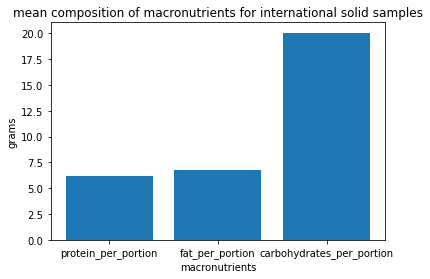

In [49]:
x_cor = np.arange(3)
plt.bar(x_cor, row_g_array)
plt.xticks(x_cor, keylist_pfc);

plt.ylabel("grams")
plt.xlabel("macronutrients")
plt.title("mean composition of macronutrients for international solid samples")

plt.show()

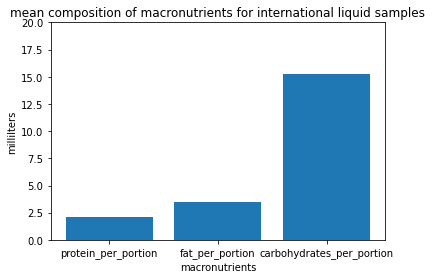

In [50]:
x_cor = np.arange(3)
plt.bar(x_cor, row_ml_array)
plt.xticks(x_cor, keylist_pfc);

plt.ylabel("millilters")
plt.xlabel("macronutrients")
plt.title("mean composition of macronutrients for international liquid samples")

plt.ylim(0.0, 20.0)

plt.show()

Now, we split our work into pieces , to help CPU memoru usage, so we have to save the modified dataframe (removing duplicates, filling nan)
-------------------------------------------------------------------------------------------------------------------------------------------
in a file for executing following parts.
-----------------------------------------

In [51]:
df.to_pickle(path='CURATED_data_385k.pkl', compression='zip')